# O modelo
Nosso cliente está interessado em vender um apartamento na Avenida Oswaldo Cruz, Flamengo, Rio de Janeiro. Fomos contratados para avaliar a que preço o imóvel deveria ser colocado à venda. Para nos auxiliar a responder essa pergunta, criaremos um modelo de regressão para prever o preço de um imóvel à venda nas imediações da Rua Oswaldo Cruz, com base em outros imóveis à venda na mesma localidade.

As informações que temos à disposição para cada imóvel são: rua onde o imóvel se localiza, área do imóvel (em m²), quantidade de quartos, quantidade de banheiros, quantidade de vagas de garagem, valor da cota do condomínio e valor do IPTU, e o preço de venda anunciado.

Vamos começar a Análise Exploratória de Dados pelo Preço do imóvel, nossa variável dependente.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('data/wrangled_data.csv')
df.head()

,Street,Area,Dorms,Baths,Parking Slots,Condominio,IPTU,Price
0,Barão de Icaraí,160.0,2,3,2,1200.0,433.0,1800000.0
1,Barão de Icaraí,100.0,2,1,2,950.0,280.0,1050000.0
2,Barão de Icaraí,78.0,2,2,1,790.0,2202.0,949999.0
3,Barão de Icaraí,102.0,3,2,1,1100.0,214.0,973000.0
4,Barão de Icaraí,130.0,3,2,1,1650.0,295.0,1150000.0


# Preço: nossa variável dependente
Essa é a variável que nosso modelo tentará prever. Vemos abaixo sua distribuição em nosso conjunto de dados. O preço médio é de cerca de R\\$ 1,5 milhão, com um desvio padrão de R\\$ 1 milhão.

O imóvel mais barato está anunciado por R\\$ 255 mil, e o mais caro por cerca de R\\$ 8 milhões. A mediana é de R\\$ 1,15 milhão.

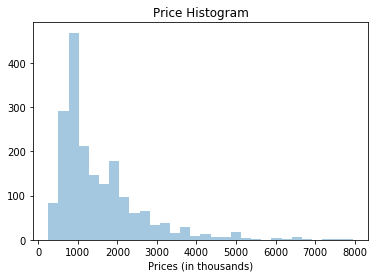

Estatística descritiva, em milhões:


count    0.001922
mean     1.529990
std      1.062784
min      0.255000
25%      0.830000
50%      1.150000
75%      1.900000
max      7.950000
Name: Price, dtype: float64

In [82]:
sns.distplot(df.Price/1000, kde=False, bins=30)

plt.title('Price Histogram')
plt.xlabel('Prices (in thousands)')
plt.show()

print('Estatística descritiva, em milhões:')
df.Price.describe()/1E6

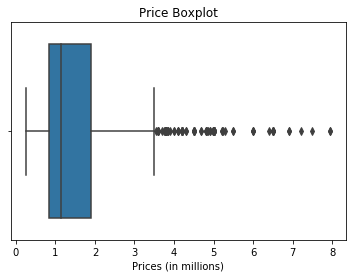

In [83]:
sns.boxplot(df.Price/1E6)

plt.title('Price Boxplot')
plt.xlabel('Prices (in millions)')
plt.show()

### Outliers de Preço
Vemos acima que temos alguns imóveis com preços muito mais altos que os demais.

Analisando os imóveis com valor acima de R\\$ 3 milhões, observamos abaixo que quase todos estão na Avenida Rui Barbosa. São imóveis estatisticamente diferentes dos demais, e estatisticamente diferentes do tipo de imóvel que queremos modelar.

Vamos eliminar esses imóveis da nossa análise com o objetivo de permitir que nosso modelo se especialize no mesmo tipo de imóvel que nosso cliente quer vender, cujo valor está bem abaixo dessa faixa.

In [84]:
#imóveis acima de R$3 milhões: onde estão localizados?
df[df.Price >= 3E6].Street.value_counts()

Rui Barbosa            145
Oswaldo Cruz            13
Marquês de Abrantes      1
Senador Vergueiro        1
Barão de Icaraí          1
Name: Street, dtype: int64

In [85]:
df = df[df.Price < 3E6]

# Área
Os imóveis anunciados possuem uma área entre 14m² e 525m². A média é de 135m², e a mediana de 107² e o percentil de 75% é 174².

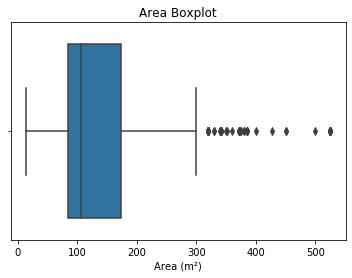

Estatística descritiva:


count    1761.000000
mean      134.995457
std        79.157567
min        14.000000
25%        84.000000
50%       107.000000
75%       174.000000
max       525.000000
Name: Area, dtype: float64

In [90]:
sns.boxplot(df.Area)

plt.title('Area Boxplot')
plt.xlabel('Area (m²)')
plt.show()

print('Estatística descritiva:')
df.Area.describe()

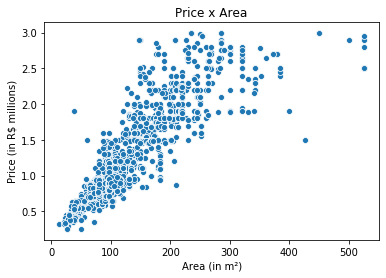

In [91]:
sns.scatterplot(x='Area', y=df['Price']/1E6, data=df)

plt.title('Price x Area')
plt.ylabel('Price (in R$ millions)')
plt.xlabel('Area (in m²)')
plt.show()

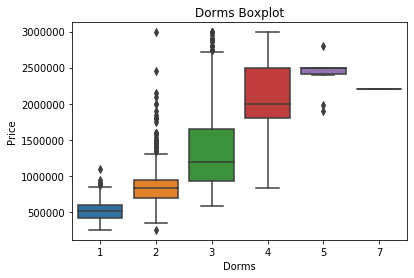

Estatística descritiva:


count    1761.000000
mean        2.749006
std         0.879392
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         7.000000
Name: Dorms, dtype: float64

In [101]:
sns.boxplot(x=df.Dorms, y=df.Price)

plt.title('Dorms Boxplot')
plt.xlabel('Dorms')
plt.show()

print('Estatística descritiva:')
df.Dorms.describe()

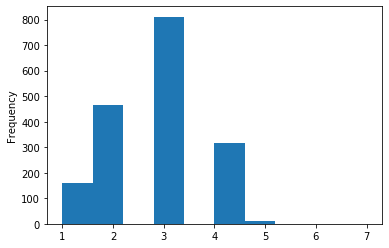

In [104]:
df.Dorms.plot.hist()

In [114]:
#sns.distplot(df.Dorms, kde=False, discrete=True)
sns.distplot(df.Dorms, discrete=True)

plt.title('Price Histogram')
plt.xlabel('Prices (in thousands)')
plt.show()

TypeError: distplot() got an unexpected keyword argument 'discrete'

In [4]:
#!pip install seaborn --upgrade
sns.__version__

'0.10.0'

* To dos: